**1) Delivery_time -> Predict delivery time using sorting time**

------------------------------------------------------------

Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

In [95]:
# Import libraries
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt

In [96]:
# Import dataset
data = pd.read_csv('/content/delivery_time.csv')
data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


**EDA and Data Visualization**

In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [136]:
#Log Transformation
data_log = np.log(data)

In [99]:
data_log.shape

(21, 2)

In [100]:
data_log

,Delivery Time,Sorting Time
0,3.044522,2.302585
1,2.602690,1.386294
2,2.983153,1.791759
3,3.178054,2.197225
4,3.367296,2.302585
5,2.731115,1.791759
6,2.944439,1.945910
7,2.251292,1.098612
8,2.884801,2.302585
9,2.931194,2.197225


<ipython-input-101-63df6fc2f4e7>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_log['Delivery Time'])


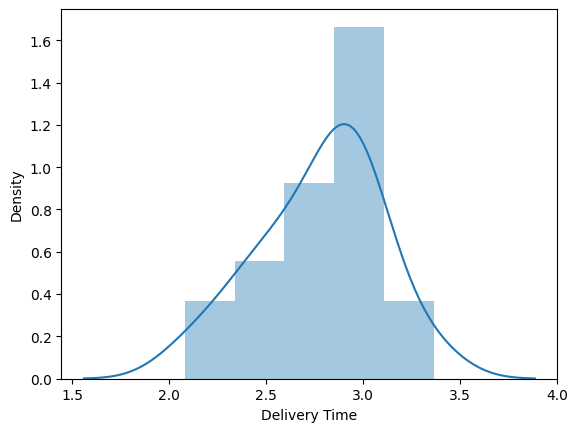

In [101]:
sns.distplot(data_log['Delivery Time'])
plt.show()

<ipython-input-102-2298fabb442d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Sorting Time'])


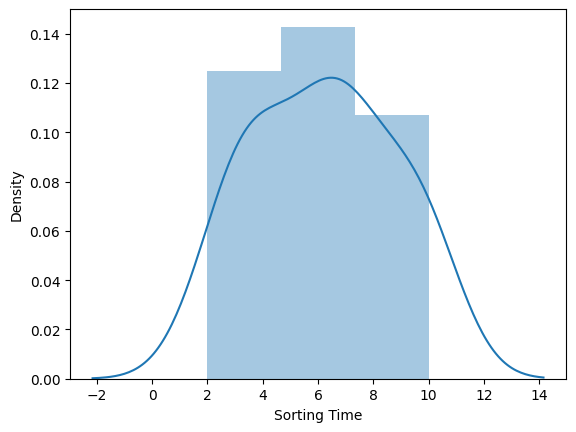

In [102]:
sns.distplot(data['Sorting Time'])
plt.show()

**Feature Engineering**

In [103]:
data_log = data_log.rename({'Delivery Time':'delivery_time','Sorting Time':'sorting_time'},axis=1)
data_log

,delivery_time,sorting_time
0,3.044522,2.302585
1,2.602690,1.386294
2,2.983153,1.791759
3,3.178054,2.197225
4,3.367296,2.302585
5,2.731115,1.791759
6,2.944439,1.945910
7,2.251292,1.098612
8,2.884801,2.302585
9,2.931194,2.197225


**Correlation Analysis**

In [104]:
data_log.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.878727
sorting_time,0.878727,1.000000


<Axes: xlabel='sorting_time', ylabel='delivery_time'>

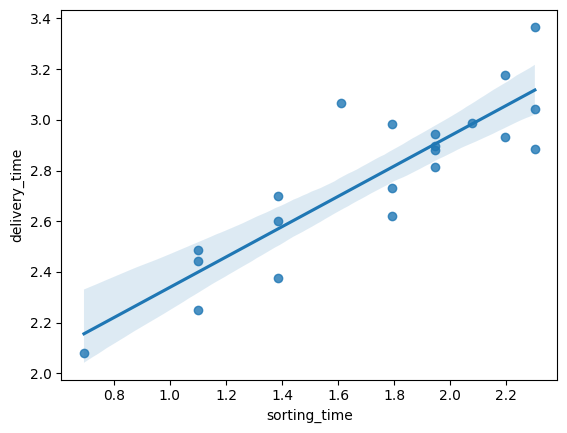

In [105]:
sns.regplot(x=data_log['sorting_time'],y=data_log['delivery_time'])

**Model Building**

In [106]:
model = smf.ols('delivery_time~sorting_time',data=data_log).fit()

**Model testing**

In [107]:
model.params        #coefficient parameters

Intercept       1.741987
sorting_time    0.597522
dtype: float64

In [108]:
model.tvalues 

Intercept       13.085552
sorting_time     8.024484
dtype: float64

In [109]:
model.pvalues

Intercept       5.921137e-11
sorting_time    1.601539e-07
dtype: float64

In [110]:
model.rsquared

0.77216134926874

In [111]:
model.rsquared_adj

0.7601698413355158

**Model Prediction**

In [112]:
new_data = pd.Series([5,8])
new_data

0    5
1    8
dtype: int64

In [113]:
data_pred = pd.DataFrame(new_data,columns=['sorting_time'])
data_pred

,sorting_time
0,5
1,8


In [114]:
model.predict(data_pred)

0    4.729599
1    6.522166
dtype: float64

**2) Salary_hike -> Build a prediction model for Salary_hike**

Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

In [115]:
# Import libraries
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt

In [116]:
#Load dataset
salary = pd.read_csv('/content/Salary_Data.csv')
salary

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


**EDA and Data Visualization**

In [117]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [135]:
# Sqare Root Transformation
salary_sqrt = np.sqrt(salary)

In [119]:
salary_sqrt

,YearsExperience,Salary
0,1.048809,198.350700
1,1.140175,214.953483
2,1.224745,194.244691
3,1.414214,208.626460
4,1.483240,199.727314
5,1.702939,237.995798
6,1.732051,245.254969
7,1.788854,233.334524
8,1.788854,253.860198
9,1.923538,239.142217


In [134]:
#Log Transformation
salary_log = np.log(salary)
salary_log

,YearsExperience,Salary
0,0.095310,10.580073
1,0.262364,10.740843
2,0.405465,10.538237
3,0.693147,10.681091
4,0.788457,10.593906
5,1.064711,10.944506
6,1.098612,11.004597
7,1.163151,10.904946
8,1.163151,11.073567
9,1.308333,10.954117


<ipython-input-94-a48c1a894370>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(salary_log['YearsExperience'])


<Axes: xlabel='YearsExperience', ylabel='Density'>

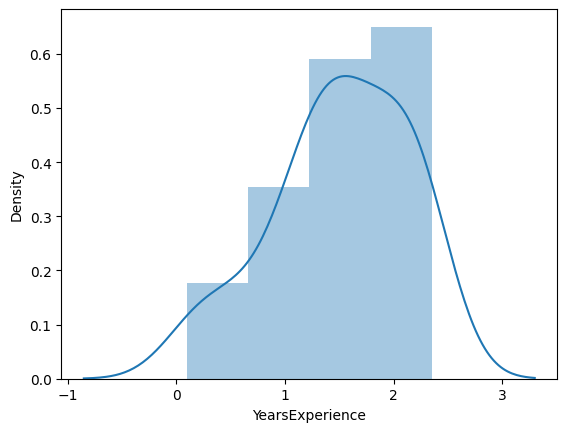

<ipython-input-121-a48c1a894370>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(salary_log['YearsExperience'])


<Axes: xlabel='YearsExperience', ylabel='Density'>

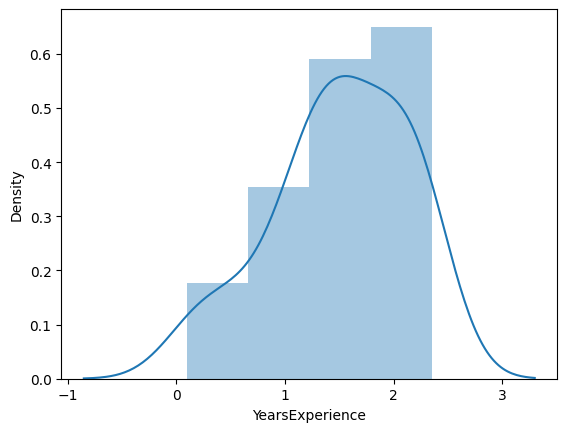

In [121]:
sns.distplot(salary_log['YearsExperience'])

<ipython-input-122-4319478f25ae>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(salary_log['Salary'])


<Axes: xlabel='Salary', ylabel='Density'>

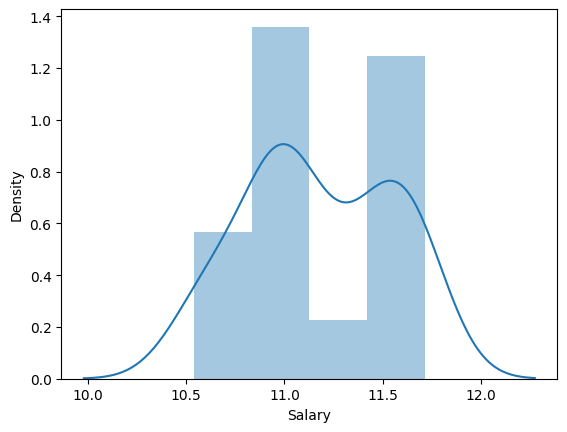

In [122]:
sns.distplot(salary_log['Salary'])

**Correlation analysis**

In [123]:
salary_log.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.951428
Salary,0.951428,1.000000


<Axes: xlabel='YearsExperience', ylabel='Salary'>

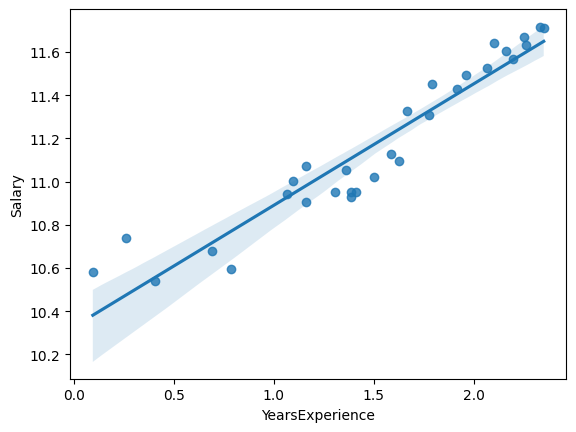

In [124]:
sns.regplot(x = salary_log['YearsExperience'],y = salary_log['Salary'])

**Model Building**

In [125]:
model = smf.ols('Salary~YearsExperience',data=salary_log).fit()

**Model Testing**

In [126]:
model.params

Intercept          10.328043
YearsExperience     0.562089
dtype: float64

In [127]:
model.tvalues

Intercept          184.867959
YearsExperience     16.352542
dtype: float64

In [128]:
model.pvalues

Intercept          9.073132e-45
YearsExperience    7.395278e-16
dtype: float64

In [129]:
model.rsquared

0.905215072581715

In [130]:
model.rsquared_adj

0.9018298966024905

**Model Prediction**

In [131]:
new_data = pd.Series([5,6])
new_data

0    5
1    6
dtype: int64

In [132]:
data_pred = pd.DataFrame(new_data,columns=['YearsExperience'])
data_pred

,YearsExperience
0,5
1,6


In [133]:
model.predict(data_pred)

0    13.138487
1    13.700576
dtype: float64